_Lambda School Data Science_
# Choose appropriate visualizations

# Upgrade Seaborn

Make sure you have at least version 0.9.0.

On Colab, go to **Restart runtime** after you run the `pip` command.

In [1]:
#!pip install --upgrade seaborn

In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

# Fix misleading visualizations

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/misleading.py
    
import misleading

--2018-11-13 15:26:39--  https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/misleading.py
Resolving raw.githubusercontent.com... 151.101.0.133, 151.101.192.133, 151.101.64.133, ...
Connecting to raw.githubusercontent.com|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1641 (1.6K) [text/plain]
Saving to: ‘misleading.py’

misleading.py       100%[===================>]   1.60K  --.-KB/s    in 0s      

2018-11-13 15:26:39 (431 MB/s) - ‘misleading.py’ saved [1641/1641]



#### Fix misleading plot #1

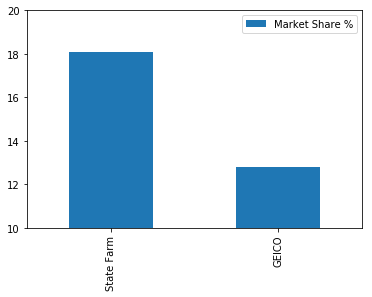

In [5]:
misleading.plot1()

The bar for State Farm ought to appear 1.4 times as tall as the bar for GEICO

In [6]:
18.07 / 12.79

1.4128225175918687

But it appears almost 3 times as tall, in the misleading plot above

In [7]:
(18.07 - 10) / (12.79 - 10)

2.892473118279571

To fix, just remove the `ylim` parameter from the `.plot.bar()` method:

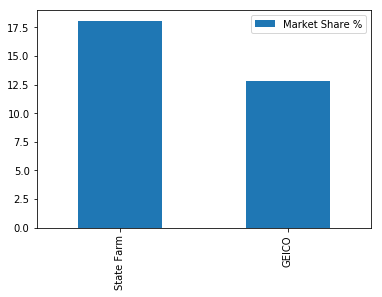

In [8]:
insurance = pd.DataFrame(
    index=['State Farm', 'GEICO'], 
    data={'Market Share %': [18.07, 12.79]})

insurance.plot.bar()

#### Fix misleading plot #2

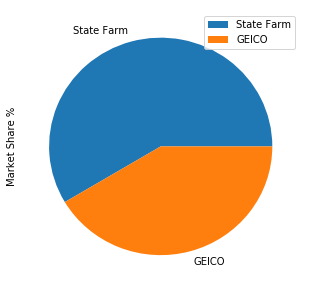

In [9]:
misleading.plot2()

The problem is the numbers don't add up to 100%. 

The pie's categories should be "mutually exclusive, collectively exhaustive."

Fix by adding an "other" category to the dataframe.

In [10]:
other = pd.DataFrame(
    index=['Other'], 
    data={'Market Share %': [100 - 18.07 - 12.79]})

insurance = insurance.append(other)

insurance

,Market Share %
State Farm,18.07
GEICO,12.79
Other,69.14


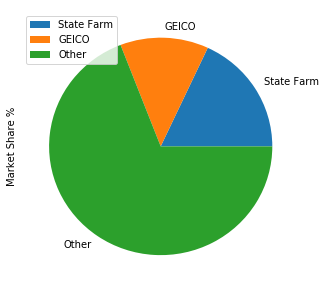

In [11]:
insurance.plot.pie('Market Share %', figsize=(5, 5))

#### Fix misleading plot #3

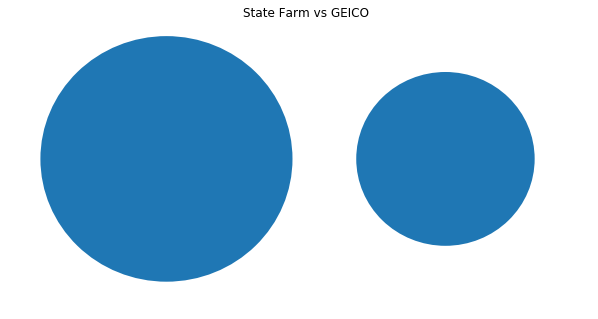

In [12]:
misleading.plot3()

The problem is the circles are sized by radius:
  

```
circle = plt.Circle(... radius=18.07)

circle = plt.Circle(... radius=12.79)
```

But people perceive size differences by area.


The first circle ought to appear 1.4x as big as the second.

In [13]:
18.07 / 12.79

1.4128225175918687

But the first circle actually appears ~2x as big as the second:

In [14]:
from math import pi
(pi*18.07**2) / (pi*12.79**2)

1.9960674662146263

If we set the radii to the square root of the data, then the areas will be correctly proportioned:

In [15]:
from math import sqrt
sqrt(18.07)**2 / sqrt(12.79)**2

1.4128225175918685

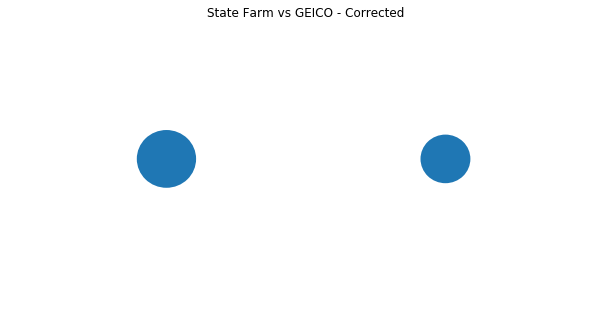

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim((0, 80))
ax.set_ylim((0, 40))
plt.axis('off')

circle = plt.Circle(xy=(20, 20), radius=sqrt(18.07))
ax.add_artist(circle)

circle = plt.Circle(xy=(60, 20), radius=sqrt(12.79))
ax.add_artist(circle)

plt.title('State Farm vs GEICO - Corrected')
plt.show()

And we can scale by a constant factor:

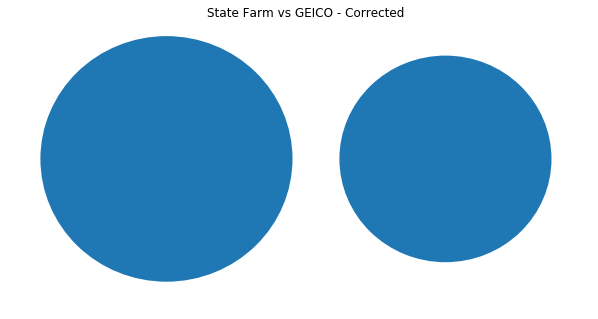

In [17]:
scale = 18.07 / sqrt(18.07)

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim((0, 80))
ax.set_ylim((0, 40))
plt.axis('off')

circle = plt.Circle(xy=(20, 20), radius=sqrt(18.07) * scale)
ax.add_artist(circle)

circle = plt.Circle(xy=(60, 20), radius=sqrt(12.79) * scale)
ax.add_artist(circle)

plt.title('State Farm vs GEICO - Corrected')
plt.show()

Compare to the original misleading visualization:

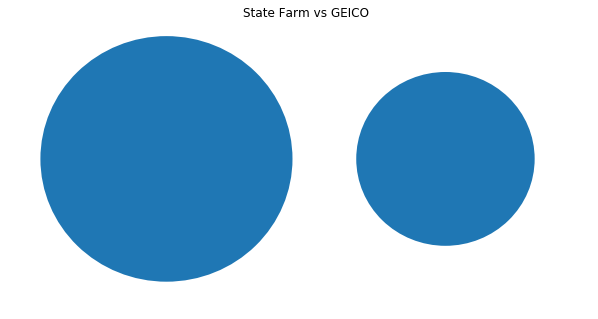

In [18]:
misleading.plot3()

#### Fix misleading plot #4

_If you're on Jupyter (not Colab) then uncomment and run this cell below:_

In [1]:
import altair as alt
alt.renderers.enable('notebook')

ValueError: 
To use the 'notebook' renderer, you must install the vega package
and the associated Jupyter extension.
See https://altair-viz.github.io/getting_started/installation.html
for more information.


In [20]:
misleading.plot4()

ModuleNotFoundError: No module named 'altair'

This is xkcd cartoonist Randall Munroe's ["Pet Peeve #208: Geographic profile maps which are basically just population maps](https://xkcd.com/1138/)".

See this US population map:

In [ ]:
# Based on https://altair-viz.github.io/gallery/choropleth_repeat.html

import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')

pop_eng_hur = data.population_engineers_hurricanes.url
variable = 'population'

alt.Chart(states).mark_geoshape().encode(
    alt.Color(variable, type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(pop_eng_hur, 'id', [variable])
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

#### Load the State Farm data:

In [ ]:
url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/direct_written_premium_by_state_by_group_private_passenger_auto.csv'
df = pd.read_csv(url)
df.rename(columns={'STATE FARM GRP': 'State Farm policy premiums'}, inplace=True)
df.head()

#### Calculate market share percentage by state:

In [ ]:
df['State Farm market share %'] = df['State Farm policy premiums'] / df['STATE TOTAL']
df.head()

#### And then map `'State Farm market share %'` 
instead of `'State Farm policy premiums'`

In [ ]:
variable = 'State Farm market share %'

alt.Chart(states).mark_geoshape().encode(
    alt.Color(variable, type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(df, 'id', [variable])
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

#### Links
- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Where to Start and End Your Y-Axis Scale](http://stephanieevergreen.com/y-axis/)
- [xkcd heatmap](https://xkcd.com/1138/)
- [Surprise Maps: Showing the Unexpected](https://medium.com/@uwdata/surprise-maps-showing-the-unexpected-e92b67398865)

# Use Seaborn to visualize distributions and relationships with continuous and discrete variables

#### Links
- [Seaborn tutorial](https://seaborn.pydata.org/tutorial.html)
- [Seaborn example gallery](https://seaborn.pydata.org/examples/index.html)
- [Chart Chooser](https://extremepresentation.typepad.com/files/choosing-a-good-chart-09.pdf)

## 1. Anscombe dataset

### Load dataset

In [ ]:
df = sns.load_dataset('anscombe')

### See the data's shape

In [ ]:
df.shape

### See the data

In [ ]:
df

### [Group by](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) `'dataset'`

In [ ]:
groups = df.groupby('dataset')

### [Describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) the groups

In [ ]:
groups.describe()

### Get the [count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html), for each column in each group

In [ ]:
groups.count()

### Get the [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) ...

In [ ]:
groups.mean()

### Get the [standard deviation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html) ...

In [ ]:
groups.std()

### Get the [correlation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) ...

In [ ]:
groups.corr()

### Use pandas to [plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) the groups, as scatter plots

In [ ]:
groups.plot('x', 'y', kind='scatter');

### Use Seaborn to make [relational plots](http://seaborn.pydata.org/generated/seaborn.relplot.html)

In [ ]:
sns.relplot('x', 'y', col='dataset', data=df, col_wrap=2);

### Use Seaborn to make [linear model plots](http://seaborn.pydata.org/generated/seaborn.lmplot.html)

In [ ]:
sns.lmplot('x', 'y', col='dataset', hue='dataset', data=df, col_wrap=2, ci=None);

#### Links
- [Seaborn examples: Anscombe's quartet](http://seaborn.pydata.org/examples/anscombes_quartet.html)
- [Wikipedia: Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
- [The Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats)

## 2. Tips dataset

### Load dataset

In [ ]:
tips = sns.load_dataset('tips')

### See the data's shape

In [ ]:
tips.shape

### See the first 5 rows

In [ ]:
tips.head()

### Describe the data

In [ ]:
tips.describe()

In [ ]:
tips.describe(exclude=[np.number])

### Make univariate [distribution plots](https://seaborn.pydata.org/generated/seaborn.distplot.html)

In [ ]:
sns.distplot(tips.tip);

In [ ]:
sns.distplot(tips.total_bill);

In [ ]:
tips['percent'] = tips.tip / tips.total_bill

In [ ]:
sns.distplot(tips.percent);

### Make bivariate [relational plots](https://seaborn.pydata.org/generated/seaborn.relplot.html)

In [ ]:
sns.relplot('total_bill', 'tip', data=tips, alpha=0.5);

In [ ]:
sns.relplot('total_bill', 'percent', data=tips, alpha=0.5);

### Make univariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

In [ ]:
tips.sex.value_counts()

In [ ]:
tips.sex.value_counts().plot.bar();

In [ ]:
sns.catplot('sex', data=tips, kind='count');

### Make bivariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

In [ ]:
sns.catplot('sex', 'tip', data=tips, kind='strip', alpha=0.5);

In [ ]:
sns.catplot('sex', 'tip', data=tips, kind='box');

In [ ]:
sns.catplot('sex', 'tip', data=tips, kind='bar');

In [ ]:
sns.catplot('sex', 'total_bill', data=tips, kind='bar');

In [ ]:
sns.catplot('sex', 'percent', data=tips, kind='bar');

## 3. Flights

### Load dataset

In [ ]:
flights = sns.load_dataset('flights')

### See the data's shape

In [ ]:
flights.shape

### See the first 5 rows

In [ ]:
flights.head()

### Describe the data

In [ ]:
flights.describe()

In [ ]:
flights.describe(exclude=[np.number])

### Plot year & passengers

In [ ]:
sns.relplot('year', 'passengers', data=flights);

In [ ]:
sns.relplot('year', 'passengers', data=flights, kind='line', ci=95);

In [ ]:
sns.relplot('year', 'passengers', data=flights, kind='line', ci='sd');

In [ ]:
sns.relplot('year', 'passengers', data=flights, kind='line', ci=None);

### Plot month & passengers

In [ ]:
sns.catplot('month', 'passengers', data=flights);
plt.xticks(rotation=90);

### Create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html) of passengers by month and year

In [ ]:
table = flights.pivot_table('passengers', 'month', 'year')

table

### Plot the pivot table as a [heat map](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [ ]:
sns.heatmap(table);

In [ ]:
plt.figure(figsize=(16, 9))
sns.heatmap(table, annot=True, fmt='d');